In [1]:
import xarray
from distributed import Client, LocalCluster
import numpy as np
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


cluster = LocalCluster(
    n_workers=1,
    processes=True,
    dashboard_address=":8004",
    threads_per_worker=1,
    memory_limit="50GB"
)
client = Client(cluster)
cluster.scale(10)
client.wait_for_workers(10)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8004/status,
Dashboard: http://127.0.0.1:8004/status,Workers: 10
Total threads: 10,Total memory: 465.66 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43983,Workers: 10
Dashboard: http://127.0.0.1:8004/status,Total threads: 10
Started: Just now,Total memory: 465.66 GiB
Comm: tcp://127.0.0.1:32849,Total threads: 1
Dashboard: http://127.0.0.1:33111/status,Memory: 46.57 GiB
Nanny: tcp://127.0.0.1:38383,


In [38]:
client.shutdown()

In [8]:
HW_DIR = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/HEAT_OUTPUTS/"

land_mask_path = "/projects/dgs/persad_research/SIMULATION_DATA/DATA/LENS1/CESM1/all/001/day/LANDFRAC/b.e11.B1850C5CN.f09_g16.005.cam.h0.LANDFRAC.200001-209912.nc"
land_mask = xarray.open_dataset(land_mask_path)["LANDFRAC"].mean(dim="time")

hw_mn_all_path = f"{HW_DIR}CESM1_LE_all_TREFHTMN_HW_METRICS.zarr"
hw_mn_xaer_path = f"{HW_DIR}CESM1_LE_xaer_TREFHTMN_HW_METRICS.zarr"
hw_mn_xghg_path = f"{HW_DIR}CESM1_LE_xghg_TREFHTMN_HW_METRICS.zarr"

hw_mn_all = xarray.open_zarr(hw_mn_all_path)["HWF"].where(land_mask > 0).sel(percentile=0.9, method="nearest")
hw_mn_xaer = xarray.open_zarr(hw_mn_xaer_path)["HWF"].where(land_mask > 0).sel(percentile=0.9, method="nearest")
hw_mn_xghg = xarray.open_zarr(hw_mn_xghg_path)["HWF"].where(land_mask > 0).sel(percentile=0.9, method="nearest")

hw_mn_all_30_yrs = []
hw_mn_xaer_30_yrs = []
hw_mn_xghg_30_yrs = []

periods = [
    (1930, 1959),
    (1960, 1989),
    (1990, 2019),
    (2020, 2049),
    (2050, 2079)
]

for start, end in periods:
    hw_mn_all_30_yrs.append(hw_mn_all.sel(year=slice(start, end)).mean(dim=["member", "year"]).compute())
    hw_mn_xaer_30_yrs.append(hw_mn_xaer.sel(year=slice(start, end)).mean(dim=["member", "year"]).compute())
    hw_mn_xghg_30_yrs.append(hw_mn_xghg.sel(year=slice(start, end)).mean(dim=["member", "year"]).compute())

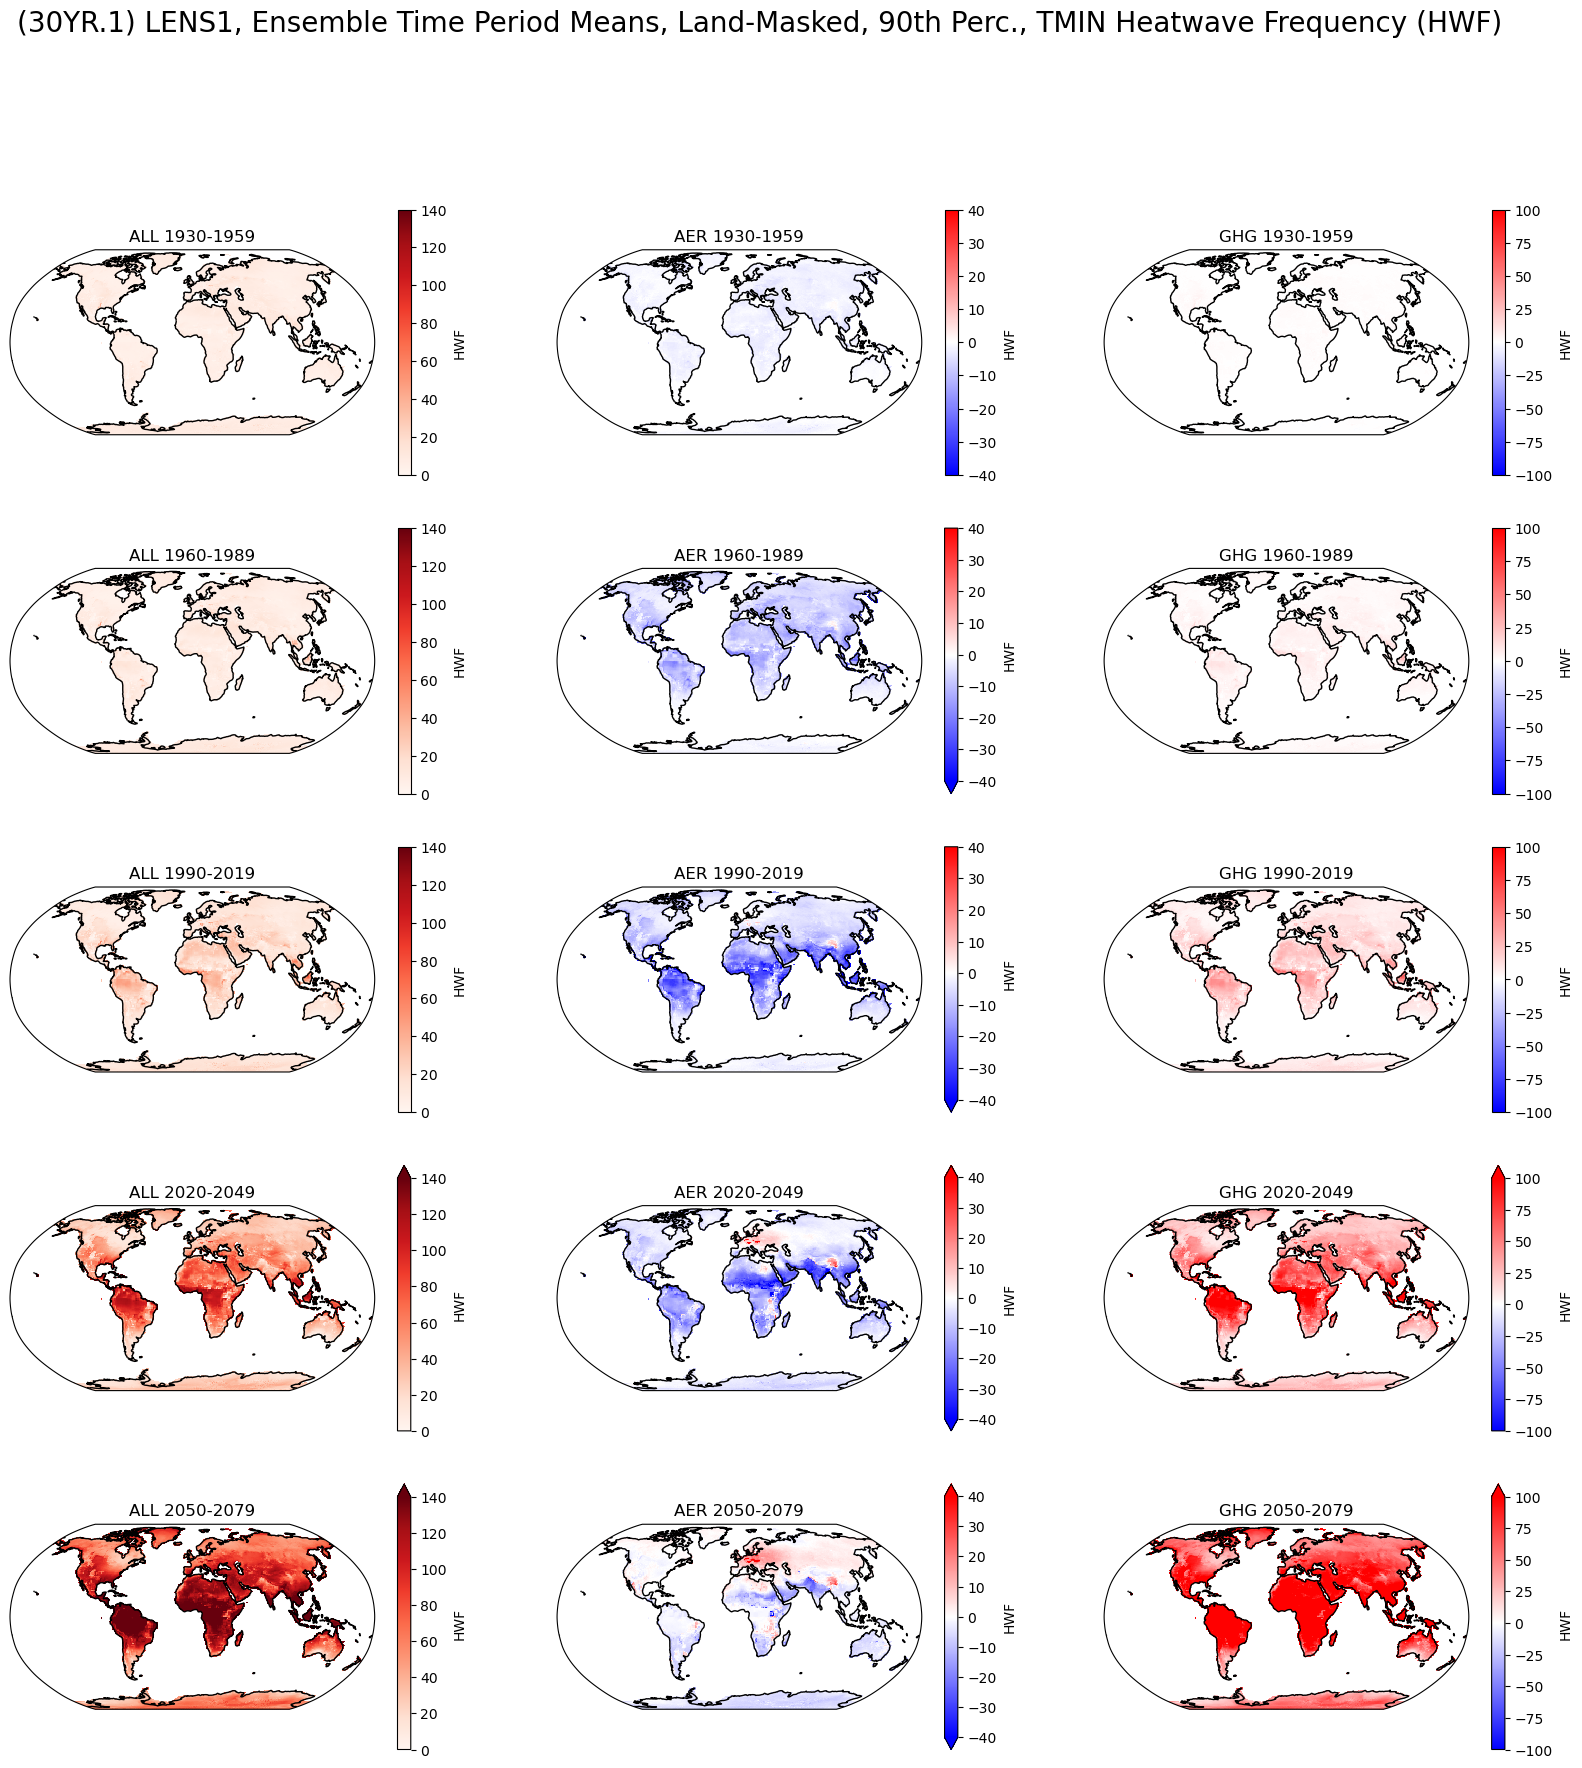

In [23]:
proj = ccrs.Robinson()
transform = ccrs.PlateCarree()
cmap = "bwr"
f, axes = plt.subplots(len(periods), 3, figsize=(20, 20), facecolor='w', subplot_kw=dict(projection=proj))

for p_index, (start_yr, end_yr) in enumerate(periods):
    hw_mn_all_30_yrs[p_index].plot(ax=axes[p_index, 0], cmap="Reds", transform=transform, vmin=0, vmax=140)
    (hw_mn_all_30_yrs[p_index] - hw_mn_xaer_30_yrs[p_index]).plot(ax=axes[p_index, 1], cmap=cmap, transform=transform, vmin=-40, vmax=40)
    (hw_mn_all_30_yrs[p_index] - hw_mn_xghg_30_yrs[p_index]).plot(ax=axes[p_index, 2], cmap=cmap, transform=transform, vmin=-100, vmax=100)

    fz = 12
    axes[p_index, 0].set_title(f"ALL {start_yr}-{end_yr}", fontsize=fz)
    axes[p_index, 1].set_title(f"AER {start_yr}-{end_yr}", fontsize=fz)
    axes[p_index, 2].set_title(f"GHG {start_yr}-{end_yr}", fontsize=fz)

    axes[p_index, 0].coastlines()
    axes[p_index, 1].coastlines()
    axes[p_index, 2].coastlines()
f.suptitle("(30YR.1) LENS1, Ensemble Time Period Means, Land-Masked, 90th Perc., TMIN Heatwave Frequency (HWF)", fontsize=20)
f.show()

In [22]:
HW_DIR = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/HEAT_OUTPUTS/"

land_mask_path = "/projects/dgs/persad_research/SIMULATION_DATA/DATA/LENS1/CESM1/all/001/day/LANDFRAC/b.e11.B1850C5CN.f09_g16.005.cam.h0.LANDFRAC.200001-209912.nc"
land_mask = xarray.open_dataset(land_mask_path)["LANDFRAC"].mean(dim="time")

hw_mx_all_path = f"{HW_DIR}CESM1_LE_all_TREFHTMX_HW_METRICS.zarr"
hw_mx_xaer_path = f"{HW_DIR}CESM1_LE_xaer_TREFHTMX_HW_METRICS.zarr"
hw_mx_xghg_path = f"{HW_DIR}CESM1_LE_xghg_TREFHTMX_HW_METRICS.zarr"

hw_mx_all = xarray.open_zarr(hw_mx_all_path)["HWF"].where(land_mask > 0).sel(percentile=0.9, method="nearest")
hw_mx_xaer = xarray.open_zarr(hw_mx_xaer_path)["HWF"].where(land_mask > 0).sel(percentile=0.9, method="nearest")
hw_mx_xghg = xarray.open_zarr(hw_mx_xghg_path)["HWF"].where(land_mask > 0).sel(percentile=0.9, method="nearest")

hw_mx_all_30_yrs = []
hw_mx_xaer_30_yrs = []
hw_mx_xghg_30_yrs = []

periods = [
    (1930, 1959),
    (1960, 1989),
    (1990, 2019),
    (2020, 2049),
    (2050, 2079)
]

for start, end in periods:
    hw_mx_all_30_yrs.append(hw_mx_all.sel(year=slice(start, end)).mean(dim=["member", "year"]).compute())
    hw_mx_xaer_30_yrs.append(hw_mx_xaer.sel(year=slice(start, end)).mean(dim=["member", "year"]).compute())
    hw_mx_xghg_30_yrs.append(hw_mx_xghg.sel(year=slice(start, end)).mean(dim=["member", "year"]).compute())

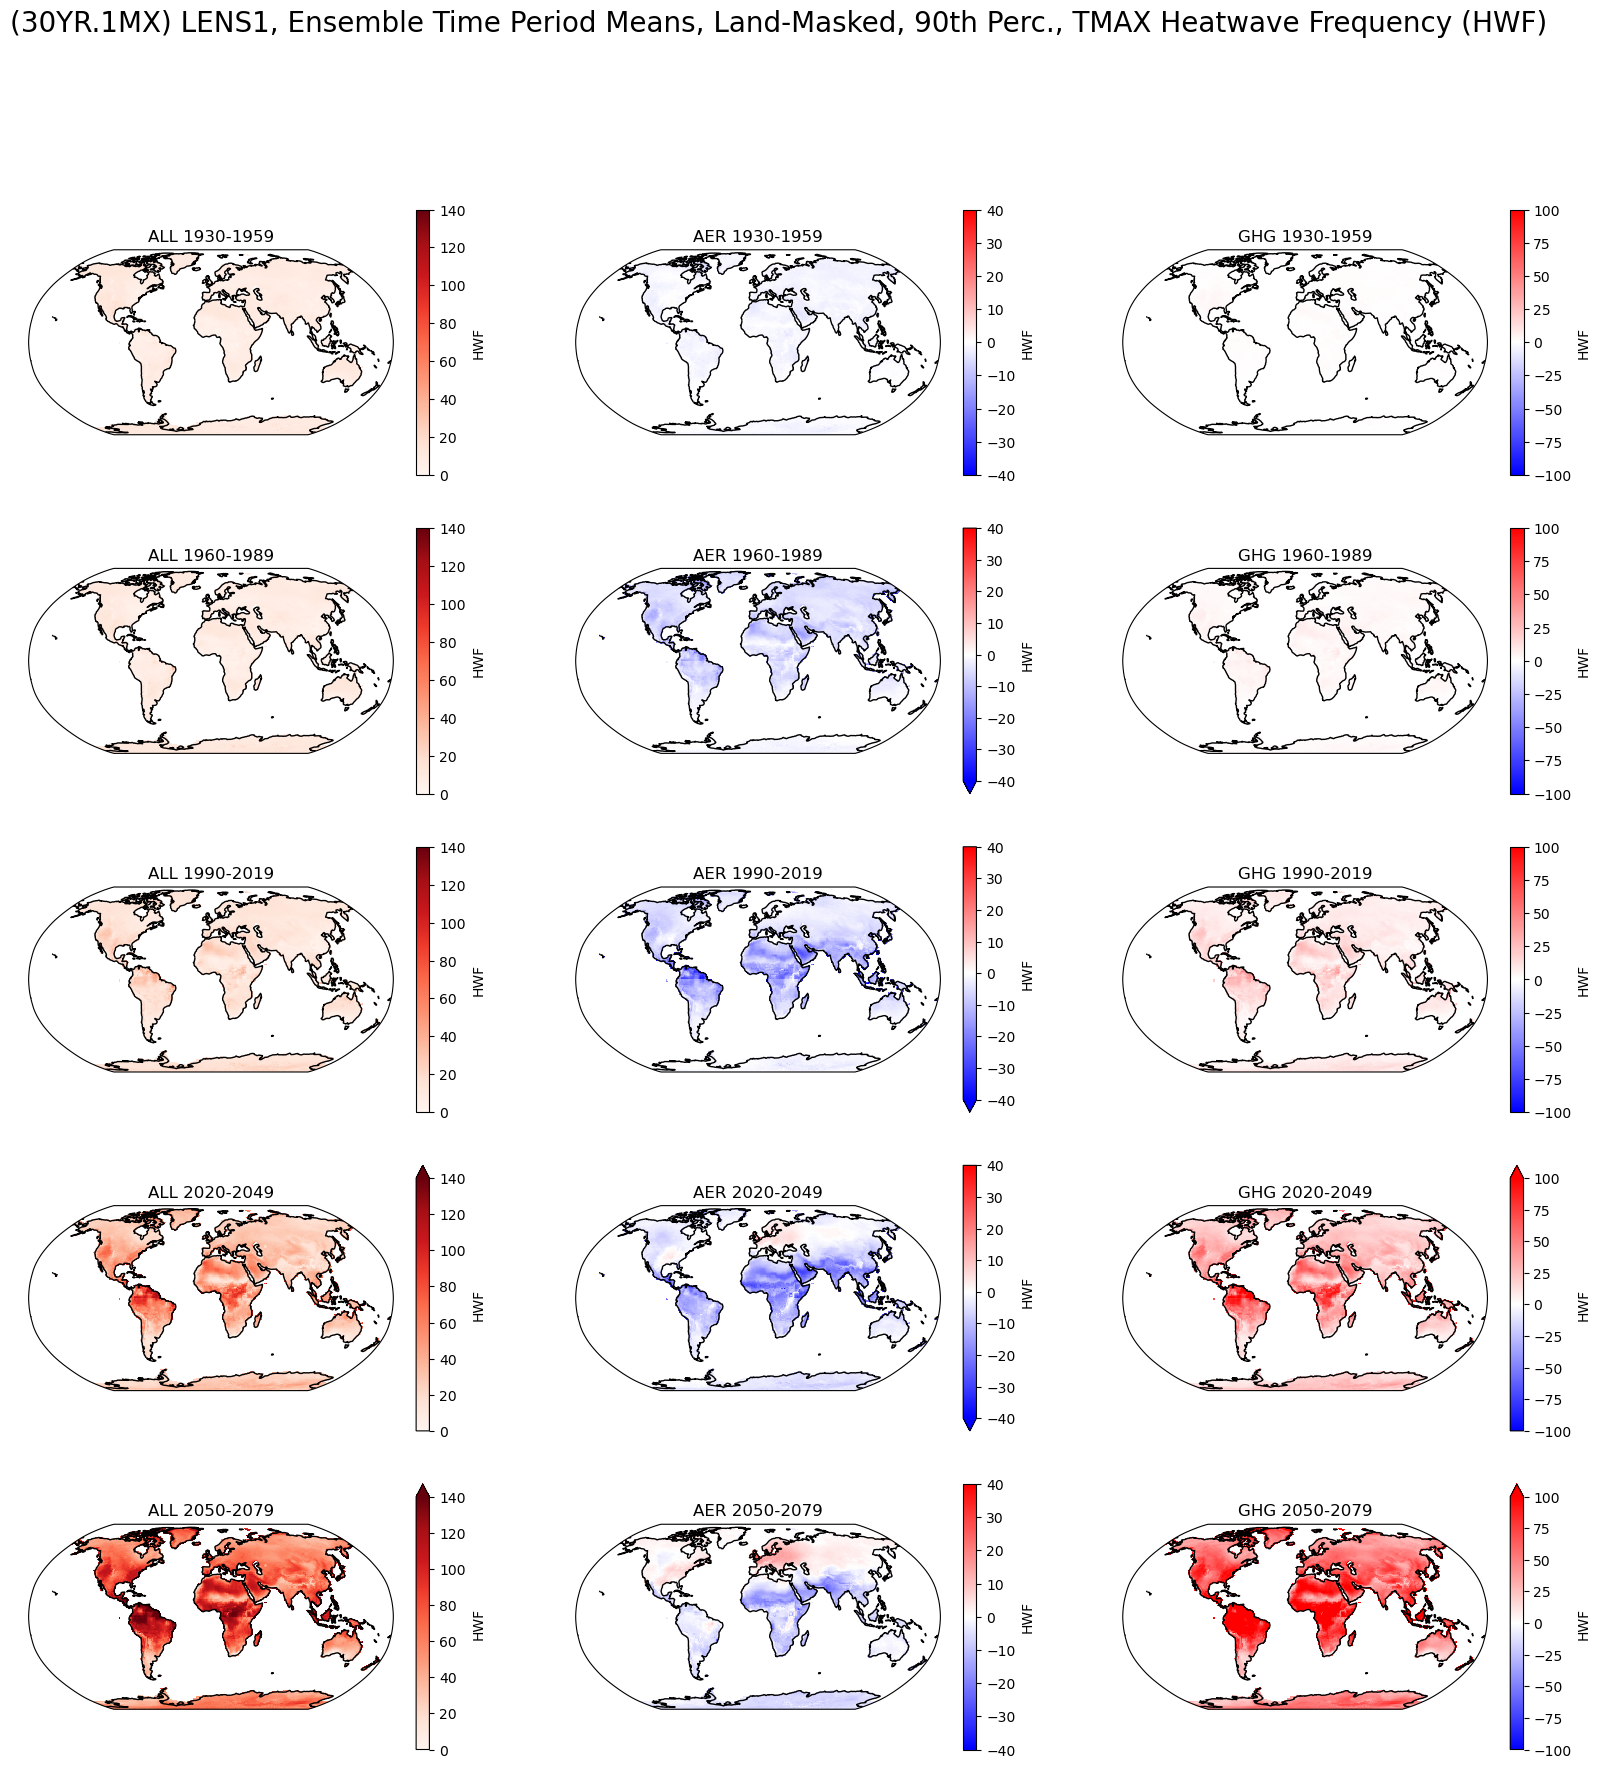

In [25]:
proj = ccrs.Robinson()
transform = ccrs.PlateCarree()
cmap = "bwr"
f, axes = plt.subplots(len(periods), 3, figsize=(20, 20), facecolor='w', subplot_kw=dict(projection=proj))

for p_index, (start_yr, end_yr) in enumerate(periods):
    hw_mx_all_30_yrs[p_index].plot(ax=axes[p_index, 0], cmap="Reds", transform=transform, vmin=0, vmax=140)
    (hw_mx_all_30_yrs[p_index] - hw_mx_xaer_30_yrs[p_index]).plot(ax=axes[p_index, 1], cmap=cmap, transform=transform, vmin=-40, vmax=40)
    (hw_mx_all_30_yrs[p_index] - hw_mx_xghg_30_yrs[p_index]).plot(ax=axes[p_index, 2], cmap=cmap, transform=transform, vmin=-100, vmax=100)

    fz = 12
    axes[p_index, 0].set_title(f"ALL {start_yr}-{end_yr}", fontsize=fz)
    axes[p_index, 1].set_title(f"AER {start_yr}-{end_yr}", fontsize=fz)
    axes[p_index, 2].set_title(f"GHG {start_yr}-{end_yr}", fontsize=fz)

    axes[p_index, 0].coastlines()
    axes[p_index, 1].coastlines()
    axes[p_index, 2].coastlines()
f.suptitle("(30YR.1MX) LENS1, Ensemble Time Period Means, Land-Masked, 90th Perc., TMAX Heatwave Frequency (HWF)", fontsize=20)
f.show()

In [37]:
for i in range(1, 21):
    i_s = str(i).zfill(3)
    template = f"b.e11.B20TRC5CNBDRD.f09_g16.{i_s}.cam.h0.AODVIS.192001-200512.nc"
    template_2 = f"b.e11.BRCP85C5CNBDRD.f09_g16.{i_s}.cam.h0.AODVIS.200601-208012.nc"
    print(f"mv {template} ../{i_s}/month/AODVIS")
    print(f"mv {template_2} ../{i_s}/month/AODVIS")

mv b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.AODVIS.192001-200512.nc ../001/month/AODVIS
mv b.e11.BRCP85C5CNBDRD.f09_g16.001.cam.h0.AODVIS.200601-208012.nc ../001/month/AODVIS
mv b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.AODVIS.192001-200512.nc ../002/month/AODVIS
mv b.e11.BRCP85C5CNBDRD.f09_g16.002.cam.h0.AODVIS.200601-208012.nc ../002/month/AODVIS
mv b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.AODVIS.192001-200512.nc ../003/month/AODVIS
mv b.e11.BRCP85C5CNBDRD.f09_g16.003.cam.h0.AODVIS.200601-208012.nc ../003/month/AODVIS
mv b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.AODVIS.192001-200512.nc ../004/month/AODVIS
mv b.e11.BRCP85C5CNBDRD.f09_g16.004.cam.h0.AODVIS.200601-208012.nc ../004/month/AODVIS
mv b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.AODVIS.192001-200512.nc ../005/month/AODVIS
mv b.e11.BRCP85C5CNBDRD.f09_g16.005.cam.h0.AODVIS.200601-208012.nc ../005/month/AODVIS
mv b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.AODVIS.192001-200512.nc ../006/month/AODVIS
mv b.e11.BRCP85C5CNBDRD.f09_g16.006.cam.h0.AODVIS